In [2]:
import chess
from bot import ChessBot
import numpy as np
from pystockfish import Engine
from IPython.display import clear_output
from IPython.core.display import display

board = chess.Board()
gruefish = ChessBot()

D:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
gruefish_black = ChessBot()
gruefish_black.explore = 0.5
gruefish_black.init_explore = 0.6

In [ ]:
shitfish = Engine(depth=9, param={"Threads": 1, "Hash": 64})
shitfish.newgame()

In [ ]:
stockfish = Engine(depth=20, param={"Threads": 12})
stockfish.newgame()

{'visits': 0, 'score': 0.3221625}
total simulations: 974 depth: 6
{'weight': 0.03534683, 'visits': 943, 'score': 0.292771577835083, 'move': 'e2e4'}
{'weight': 0.73052645, 'visits': 10, 'score': 0.4744703769683838, 'move': 'g1f3'}
{'weight': 0.20764203, 'visits': 10, 'score': 0.47875410318374634, 'move': 'd2d4'}


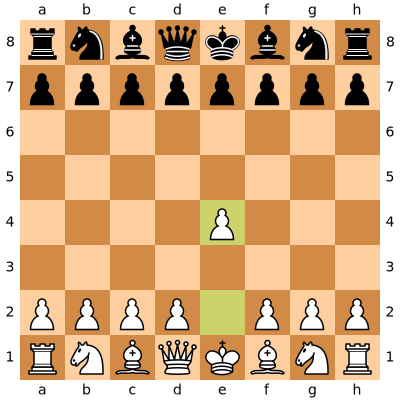

In [3]:
if board.is_game_over():
    print(board.result())
else:
    if board.turn == chess.WHITE:
        move = gruefish.best_move(board, time_limit=10, depth=6, debug=True)
        board.push_uci(move['move'])
    else:
        shitfish.setfenposition(board.fen())
        board.push_uci(shitfish.bestmove()['move'])

board

In [4]:
gruefish.game.meta_data

{'check_result_time': 0.015549898147583008,
 'expand_time': 10.788239240646362,
 'infer_time': 10.513950109481812,
 'inferences': 363,
 'input_gen_time': 0.055626869201660156,
 'move_validation_time': 0.19357752799987793,
 'pop_time': 0.012013673782348633,
 'push_time': 0.27213048934936523}

In [5]:
gruefish.meta_data

{'backprop_time': 0.10882163047790527,
 'choose_move_time': 0.6473085880279541,
 'maths_time': 0.006513118743896484}

In [1]:
fen = board.fen()
print(fen)
fen = '8/8/5R2/8/7P/6PK/4k3/7q w - - 6 54'
board = chess.Board(fen=fen)

NameError: name 'board' is not defined

In [ ]:
board.reset()

In [ ]:
gruefish.clear_cache()

In [ ]:
while not board.is_game_over(claim_draw=True):
    if board.turn == chess.WHITE:
        move = gruefish.best_move(board, depth=7, time_limit=20, debug=True, eval_freq=10)
        board.push_uci(move['move'])
#         shitfish.setfenposition(board.fen())
#         board.push_uci(shitfish.bestmove()['move'])
#         clear_output()
        display(board)
    else:
#         move = gruefish.best_move(board, time_limit=20, debug=True, end_early_eval=21)
#         board.push_uci(move['move'])
        shitfish.setfenposition(board.fen())
        board.push_uci(shitfish.bestmove()['move'])
        display(board)
        
print(board.result(claim_draw=True), len(board.move_stack))

In [ ]:
board.fen()

In [ ]:
board2= chess.Board(fen=board.fen())
board2.result()

In [ ]:
temp_board = chess.Board()

In [ ]:
temp_board.pop()
temp_board

In [ ]:
if len(board.move_stack) > len(temp_board.move_stack):
    temp_board.push(board.move_stack[len(temp_board.move_stack)])

temp_board

In [ ]:
board.pop()
board

In [ ]:
gruefish.init_explore = 0.5
gruefish.explore = 0.2

In [ ]:
gruefish.clear_cache()
# board = chess.Board(fen=bad_decisions[0])
move = gruefish.best_move(board, depth=3, time_limit=20, debug=True)

In [ ]:
board.push_uci('d7d2')

In [ ]:
board

In [ ]:
moves, score = gruefish.cache[board.fen()]
moves = sorted(moves, key=lambda x: x['mcts_score'], reverse=True)
print(score)
total_score = 0
total_simulations = 0

for move in moves:
    print(move)
    total_score += move['total_score']
    total_simulations += move['visit_count']
    
print(total_score, total_simulations, total_score/total_simulations)

In [ ]:
stockfish.setfenposition(board.fen())
stockfish.bestmove()

In [ ]:
board.fen()

In [ ]:
bad_decisions = [
    'r1b1k2r/2p1q1pp/1pnppn2/p2P1p2/2P5/P1BBPN2/1P3PPP/R2Q1RK1 b kq - 0 11',
    '1rb1k2r/1p2ppbp/3P1np1/p1n1N3/Pqp5/2N5/1PPQBPPP/R1B2RK1 b k - 0 14',
    '1K6/7P/8/8/8/4k3/8/8 w - - 7 171',
    '8/8/8/2k4K/P3P3/8/7P/8 w - - 0 30',
    'r1bqk2r/1p1p1ppp/2n1pb2/p1P5/QPP1n3/P3PN2/R4PPP/1NB1KB1R b Kkq - 2 9',
    '2r1n1k1/1r6/4pnp1/2pP2Bp/2Bb4/3Q3P/Nq2RPP1/2R3K1 b - - 1 37'
]